# How does the educational background of parents influence the academic performance of students in final exams, as well as their interest in pursuing higher education? Specifically, do students whose parents have higher levels of education (e.g., secondary education or higher) perform better in their final exams compared to those whose parents have lower levels of education? Additionally, do students from higher-educated families demonstrate a stronger interest in pursuing higher education themselves? 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import f_oneway
from sqlalchemy import create_engine


In [2]:
# Load the dataset (assuming you already have it in the same folder or use the database connection to load it)
engine = create_engine('sqlite:///../student_performance.db')
df_mat = pd.read_sql("SELECT * FROM student_mat", engine)
df_por = pd.read_sql("SELECT * FROM student_por", engine)

In [3]:
# Combine both datasets
df = pd.concat([df_mat, df_por], ignore_index=True)

In [4]:
# Create new categorical variables representing the education level of the parents
education_levels = {
    0: 'None', 
    1: 'Primary', 
    2: 'Secondary', 
    3: 'Higher'
}

df['Medu_level'] = df['Medu'].map(education_levels)
df['Fedu_level'] = df['Fedu'].map(education_levels)

# Create a combined feature that describes both parents' education levels
df['parents_education'] = df['Medu_level'] + ' & ' + df['Fedu_level']

# Create a binary variable for students wanting higher education
df['higher'] = df['higher'].map({'yes': 1, 'no': 0})


In [5]:
# Descriptive statistics for G3 (final grades) based on parental education level
df[['Medu_level', 'Fedu_level', 'G1', 'G2', 'G3']].groupby(['Medu_level', 'Fedu_level']).mean()

# Cross-tabulation of parental education and desire for higher education
cross_tab = pd.crosstab(df['parents_education'], df['higher'])
cross_tab


higher,0,1
parents_education,,
Higher & Higher,3,89
Higher & Primary,3,32
Higher & Secondary,11,59
None & None,0,1
None & Primary,2,1
None & Secondary,0,5
Primary & Higher,5,8
Primary & None,0,6
Primary & Primary,21,108


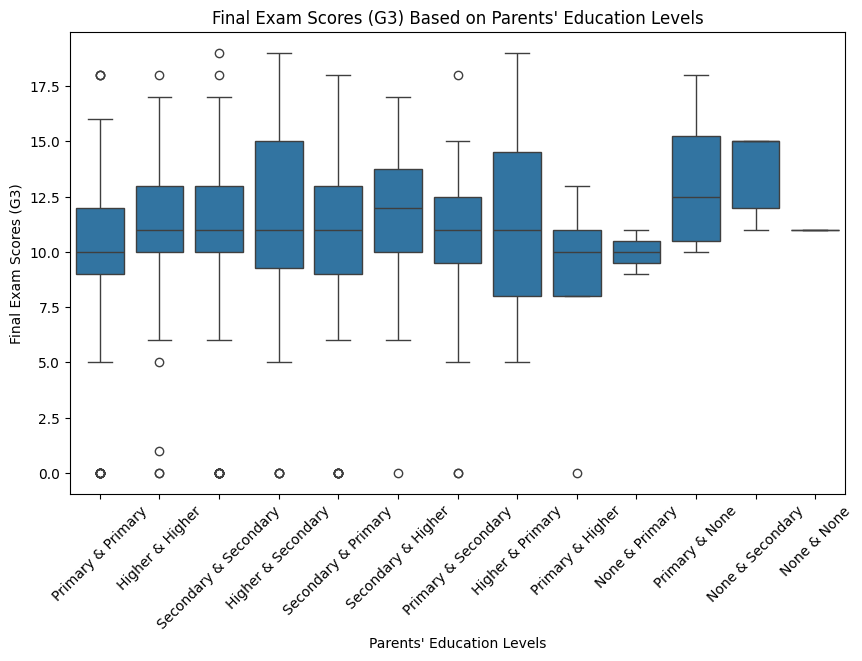

In [6]:
# Visualize the difference in final grades (G3) based on parents' education level
plt.figure(figsize=(10, 6))
sns.boxplot(x='parents_education', y='G3', data=df)
plt.title('Final Exam Scores (G3) Based on Parents\' Education Levels')
plt.xlabel('Parents\' Education Levels')
plt.ylabel('Final Exam Scores (G3)')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Grouping students based on parents' education level
grouped = df.groupby('parents_education')['G3'].apply(list)

# ANOVA test
f_stat, p_value = f_oneway(*grouped)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 1.7069087573289379, P-value: 0.0611815177763779


     The results of the ANOVA test indicate the following:
      F-statistic: 1.71
      P-value: 0.0612
      The p-value (0.0612) is slightly greater than the typical significance level of 0.05. This suggests that there is no statistically significant difference in final exam scores (G3) between students with different parental education levels at the 5% significance level. However, the p-value is close to 0.05, indicating that the result is marginally significant. It might be worth investigating further, possibly by considering other factors or increasing the sample size.

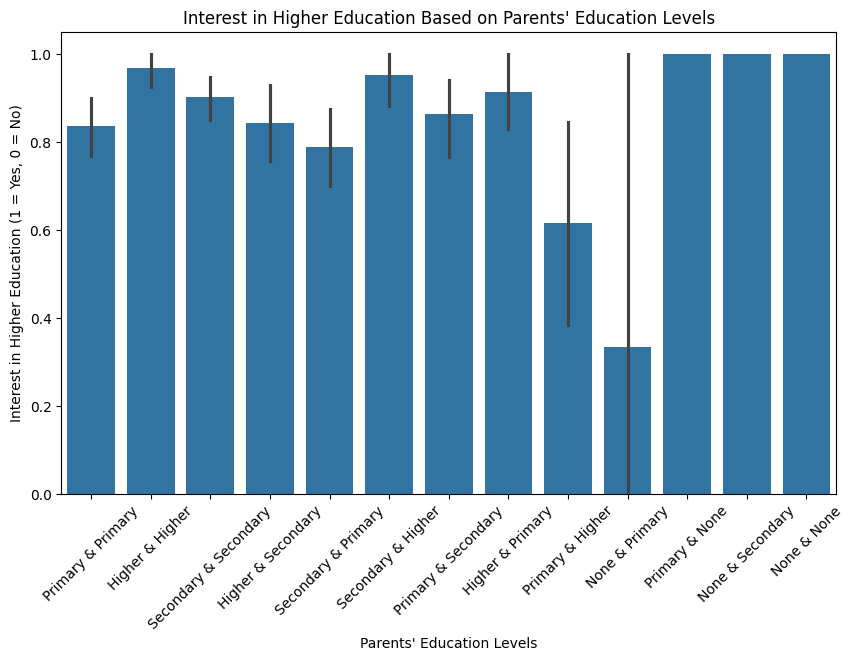

In [8]:
# Visualize the interest in higher education based on parents' education level
plt.figure(figsize=(10, 6))
sns.barplot(x='parents_education', y='higher', data=df)
plt.title('Interest in Higher Education Based on Parents\' Education Levels')
plt.xlabel('Parents\' Education Levels')
plt.ylabel('Interest in Higher Education (1 = Yes, 0 = No)')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Perform a Chi-Square test to test the relationship between parental education and interest in higher education
contingency_table = pd.crosstab(df['parents_education'], df['higher'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_val}")

Chi-square statistic: 36.29576319637701, P-value: 0.0002903589184593563


    The results of the Chi-Square test are as follows:

    Chi-square statistic: 36.30
    P-value: 0.00029
    The p-value is much smaller than the typical significance level of 0.05, indicating that there is a statistically significant relationship between parental education and students' interest in pursuing higher education. This suggests that students whose parents have higher education levels are more likely to express an interest in pursuing higher education themselves.

In [10]:
# Logistic Regression to model the probability of pursuing higher education based on parental education level
X = pd.get_dummies(df[['Medu_level', 'Fedu_level', 'age', 'freetime', 'goout']], drop_first=True)  # One-hot encode categorical variables
X = sm.add_constant(X)  # Add constant for intercept
y = df['higher']  # Dependent variable (whether the student wants higher education)

# Logistic Regression model
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# Linear regression to predict academic performance (G3) based on parental education and other factors
X = pd.get_dummies(df[['Medu_level', 'Fedu_level', 'age', 'freetime', 'goout']], drop_first=True)  # One-hot encode categorical variables
X = sm.add_constant(X)  # Add constant for intercept
y = df['G3']  # Dependent variable (final exam score)

# Linear Regression model
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
